# $N_{\rm H}$ vs. $A_{\rm V}$

This notebook plots the hydrogen column density ($N_{\rm H}$) determined from X-ray spectral fits with a crude estimate of $A_{\rm V}$ determined from the relationship between X-ray luminosity and broad H-alpha luminosity. 

In [1]:
# Standard module imports
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
# Setup figures and upload plotting modules
style='notebook'
execfile('/Users/ttshimiz/Dropbox/Research/figure_setup.py')

In [3]:
# Upload the sample data
df = pd.read_csv('../data/cleaned_sample.csv', index_col=0)
df_all = pd.read_csv('../data/cleaned_sample_all_seyferts.csv')

In [4]:
ind_sy1 = (df['Type'] == 1) | (df['Type'] == 1.2)
ind_sy1_9 = (df['Type'] == 1.9)

First step is measuring the "intrinsic" relationship between the X-ray luminosity and broad H-alpha luminosity for the unobscured population.

In [5]:
from scipy import stats

In [6]:
x = np.log10(df['Intrinsic X-ray Luminosity'][ind_sy1])
y = np.log10(df['Broad Halpha Luminosity'][ind_sy1])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print 'Slope =', slope
print 'Intercept =', intercept
print 'Corr. Coefficient =', r_value
print 'P-value =', p_value
print 'Standard Error =', std_err

Slope = 1.08530371536
Intercept = -5.27057849569
Corr. Coefficient = 0.852988826468
P-value = 2.12204325407e-35
Standard Error = 0.0608759903125


We'll use this relationship to determine what the unobscured broad H-alpha luminosity is based on the absorption corrected X-ray luminosity.

In [7]:
df['BrHalpha from X-ray'] = np.log10(df['Intrinsic X-ray Luminosity'])*slope + intercept

Use a simple dust screen geometry to calculate the extinction for H-alpha (6563 Angstroms).

In [8]:
df['A Halpha'] = 2.5*np.log10(10**df['BrHalpha from X-ray']/df['Broad Halpha Luminosity'])

For now we'll change all of the negative values to 0 mags. Later on we'll need to make estimates of the upper limit for these sources.

In [9]:
df['A Halpha'][df['A Halpha'] < 0] = 0

To convert to $A_{\rm V}$ we'll use the extinction law from Wild+2011:

$\frac{A_{\lambda}}{A_{\rm V}} = 0.6(\lambda/5500)^{-1.3} + 0.4(\lambda/5500)^{-0.7}$

In [10]:
df['AV'] = df['A Halpha']/(0.6*(6563./5500.)**(-1.3) + 0.4*(6563./5500.)**(-0.7))

Now we can plot $A_{\rm V}$ against $N_{\rm H}$!

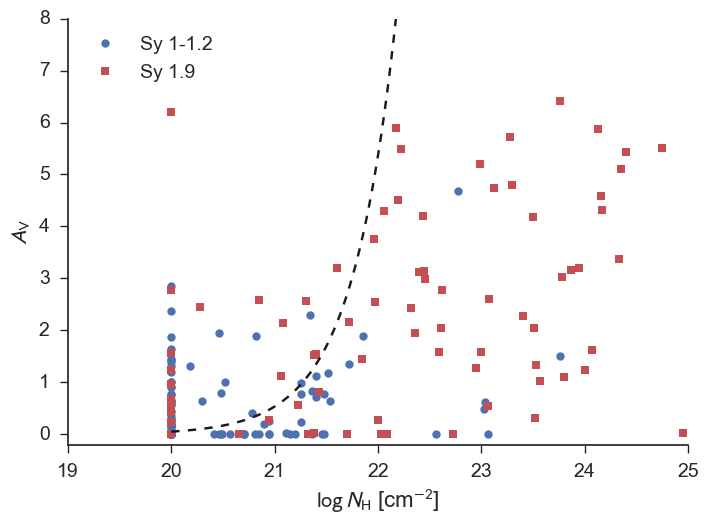

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

nh = 10**np.arange(20, 25, 0.001)
av = nh*5.35e-22

ax.plot(df['NH'][ind_sy1], df['AV'][ind_sy1], color='b', 
        marker='o', ms=6, ls='None', label='Sy 1-1.2', alpha=1.0)
ax.plot(df['NH'][ind_sy1_9], df['AV'][ind_sy1_9], color='r',
        marker='s', ms=6, ls='None', label='Sy 1.9', alpha=1.0)
ax.plot(np.log10(nh), av, 'k--')
ax.set_xlabel(r'$\log\, N_{\rm H}$ [cm$^{-2}$]')
ax.set_ylabel(r'$A_{\rm V}$')
ax.set_xlim(19, 25)
ax.set_ylim(-0.2, 8)
ax.legend(loc='upper left')
sn.despine()

#fig.savefig('../figures/AV_vs_NH.pdf', bbox_inches='tight')

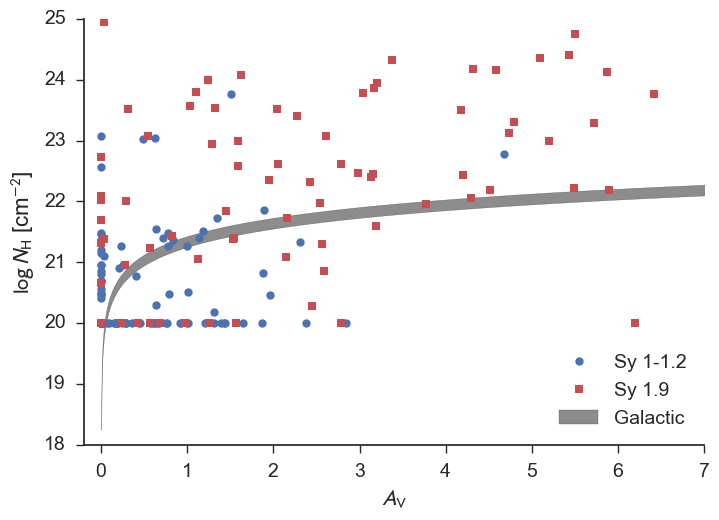

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

av = np.arange(0, 8, 0.001)
nh_up = 2.69e21*av
nh_down = 1.79e21*av

ax.plot(df['AV'][ind_sy1], df['NH'][ind_sy1], color='b', 
        marker='o', ms=6, ls='None', label='Sy 1-1.2', alpha=1.0)
ax.plot(df['AV'][ind_sy1_9], df['NH'][ind_sy1_9], color='r',
        marker='s', ms=6, ls='None', label='Sy 1.9', alpha=1.0)
ax.fill_between(av, np.log10(nh_down), np.log10(nh_up), color='k', alpha=0.5, label='Galactic')
ax.set_ylabel(r'$\log\, N_{\rm H}$ [cm$^{-2}$]')
ax.set_xlabel(r'$A_{\rm V}$')
#ax.set_ylim(19, 25)
ax.set_xlim(-0.2, 7)
ax.legend(loc='lower right')
sn.despine()

#fig.savefig('../figures/NH_vs_AV.pdf', bbox_inches='tight')

In [13]:
df[(df['NH'] == 20.) & (df['AV'] > 4.0)]

,Broad Halpha Flux,Distance,Intrinsic 14-150 Flux,NH,Type,Intrinsic X-ray Luminosity,Broad Halpha Luminosity,BrHalpha from X-ray,A Halpha,AV
459,2.571052,1287.49,7.7,20.0,1.9,1.527496e+45,5.100354e+41,43.767763,5.150407,6.202917
